In [41]:
import numpy as np
import cartopy.feature as cfea
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress
import cartopy
import datetime
import cartopy.crs as ccrs
import calendar
import pickle

In [3]:
# website    https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/seaice_analysis/

In [4]:
total_exts = np.array(pickle.load(open('../pickles/Antarctic_maxs.p','rb'))[1])*1e6
minim_exts = np.array(pickle.load(open('../pickles/Antarctic_mins.p','rb'))[1])*1e6

# Compare Max Extents

In [5]:
regions = ['Bell-Amundsen', 'Indian', 'Pacific', 'Ross', 'Weddell']

data_dict = {}

for region in regions:

    df = pd.read_excel('../data/nsidc/S_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx',
                        sheet_name=f'{region}-Extent-km^2')

    df.drop(columns=['month',   'day'],
            inplace=True)

    df['doy'] = np.arange(1,df.shape[0]+1)
    df.set_index('doy',inplace=True)
    
    doy_mins = []
    doy_maxs = []
    years = []

    for col in df.columns:
        
        print(region,
              col,
              datetime.date(col,1,1) + datetime.timedelta(days=int(np.argmax(df[col]))),
              datetime.date(col,1,1) + datetime.timedelta(days=int(np.argmin(df[col]))),
              )
        
        doy_max = np.max(df[col])
        doy_maxs.append(doy_max)
        doy_min = np.min(df[col])
        doy_mins.append(doy_min)
        years.append(int(col))

    years = years[1:-1]
    doy_maxs = doy_maxs[1:-1]
    doy_mins = doy_mins[1:-1]
    
    data_dict[f'{region}_max'] = doy_maxs
    data_dict[f'{region}_min'] = doy_mins
    
regional_df = pd.DataFrame(data_dict)

regional_df.index = years

tick_labels = [x.split('_')[0] for x in regional_df.columns  if 'max' not in x]
tick_labels = ['B-A'] + tick_labels[1:]

regional_df['total_max'] = total_exts
regional_df['total_min'] = minim_exts

Bell-Amundsen 1978 1978-11-03 1979-01-01
Bell-Amundsen 1979 1979-09-15 1979-03-09
Bell-Amundsen 1980 1980-08-11 1980-03-14
Bell-Amundsen 1981 1981-10-04 1981-04-03
Bell-Amundsen 1982 1982-09-09 1982-02-22
Bell-Amundsen 1983 1983-10-08 1983-05-01
Bell-Amundsen 1984 1984-10-15 1984-03-17
Bell-Amundsen 1985 1985-09-13 1985-03-25
Bell-Amundsen 1986 1986-09-16 1986-03-22
Bell-Amundsen 1987 1987-07-23 1987-02-18
Bell-Amundsen 1988 1988-08-04 1988-02-17
Bell-Amundsen 1989 1989-10-28 1989-02-25
Bell-Amundsen 1990 1990-09-01 1990-03-02
Bell-Amundsen 1991 1991-08-21 1991-03-04
Bell-Amundsen 1992 1992-09-28 1992-03-16
Bell-Amundsen 1993 1993-08-31 1993-03-08
Bell-Amundsen 1994 1994-10-04 1994-04-12
Bell-Amundsen 1995 1995-08-06 1995-02-26
Bell-Amundsen 1996 1996-08-28 1996-02-23
Bell-Amundsen 1997 1997-09-16 1997-03-10
Bell-Amundsen 1998 1998-09-15 1998-02-26
Bell-Amundsen 1999 1999-09-11 1999-03-07
Bell-Amundsen 2000 2000-09-21 2000-03-02
Bell-Amundsen 2001 2001-09-13 2001-03-02
Bell-Amundsen 20

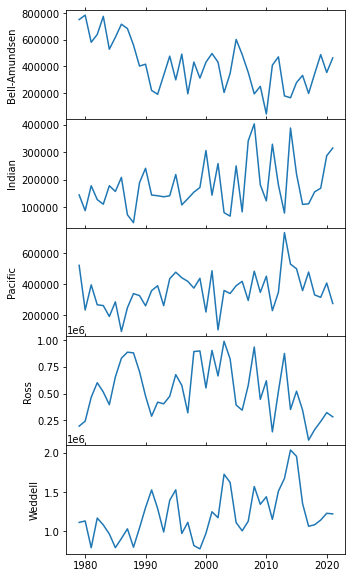

In [6]:
fig, axs = plt.subplots(len(regions),1,figsize=(5,10))

for region, ax in zip(regions,axs.reshape(-1)):
    ax.plot(regional_df.index,regional_df[f'{region}_min'])
    ax.set_ylabel(region)
    ax.set_xticks(np.arange(1980,2021,10))
    ax.tick_params('x',top=True,bottom=True)
    if region == 'Weddell':
        ax.set_xticklabels(np.arange(1980,2021,10))
    
    
fig.subplots_adjust(hspace=0)

In [7]:
regional_df

,Bell-Amundsen_max,Bell-Amundsen_min,Indian_max,Indian_min,Pacific_max,Pacific_min,Ross_max,Ross_min,Weddell_max,Weddell_min,total_max,total_min
1979,2725807.632,751503.925,3879702.040,144974.373,1970245.549,522882.933,4139113.112,194146.567,6798821.656,1114416.874,18361000.0,2911000.0
1980,2305525.893,785145.489,3782401.591,87440.287,1989589.363,234299.282,3964516.467,240982.544,7761489.647,1132556.778,19092000.0,2521000.0
1981,2465734.216,581383.519,3904356.802,178256.675,2048364.758,396801.543,4180219.553,464926.468,7262077.738,793016.514,18856000.0,2694000.0
1982,2421419.368,640282.026,3883074.934,127622.042,2607570.410,267910.029,4019455.088,601294.349,6430325.299,1169444.731,18550000.0,2890000.0
1983,2268235.511,776029.139,3728756.092,110926.413,2434000.199,262754.693,4363050.189,514138.329,6671094.797,1082614.556,18811000.0,2843000.0
1984,2423852.569,529159.349,3828271.928,178351.795,2026244.955,192520.501,4383268.994,395390.068,6678100.848,967514.958,18370000.0,2382000.0
1985,2498105.778,618984.003,3808417.236,157504.676,2255758.897,286939.091,4359017.530,655688.262,6433972.339,793812.125,18931000.0,2602000.0
1986,2726612.919,717048.306,3597311.497,208598.792,2006175.735,95939.724,3866166.460,831087.007,6359959.110,910328.130,18027000.0,2953000.0
1987,2501472.874,684391.304,3680844.543,72151.683,1915475.774,249489.851,4009161.984,887966.378,7232539.574,1033138.238,18524000.0,3010000.0
1988,1912051.204,560494.320,3783716.892,43416.628,2081810.162,340266.841,4442711.433,881581.869,7126512.662,799297.192,18785000.0,2639000.0


In [8]:
sam_df = pd.read_csv('../data/climate_indexes/SAM.csv',delim_whitespace=True)

sam_df = sam_df[np.isin(sam_df['YEAR'], np.arange(1979,2022))]

sam_df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
22,1979,0.74,-0.90,1.51,-0.49,1.54,2.52,3.14,1.39,-0.02,0.54,-1.26,-1.88
23,1980,0.01,-1.75,-2.58,-1.77,-0.51,3.19,-1.68,-1.68,-2.56,0.45,-2.09,-0.10
24,1981,0.84,1.76,-2.47,-3.52,0.88,0.38,-1.43,-1.99,-1.49,-0.39,2.34,2.21
25,1982,-0.77,0.70,4.28,2.89,-0.70,2.40,0.01,1.00,1.56,-2.14,-2.32,-2.21
26,1983,-2.44,0.89,-0.71,-0.60,-0.68,0.38,1.63,0.09,-0.72,2.05,3.79,1.52
27,1984,-1.96,-1.74,-0.38,-0.23,-0.33,1.08,-0.21,-2.33,-0.16,1.06,0.34,-3.22
28,1985,-2.38,-0.02,-0.08,0.95,0.38,-2.49,2.64,1.26,1.07,0.57,2.28,1.90
29,1986,0.37,-4.89,-1.26,-0.57,-2.19,-0.95,-0.02,1.68,2.72,-0.38,0.50,1.31
30,1987,-2.51,-2.49,-1.11,-0.17,-0.34,0.18,-0.26,1.79,-0.72,0.78,1.77,0.30
31,1988,0.13,0.12,-2.01,2.11,-2.03,-3.06,0.64,-2.00,-2.70,-6.03,1.77,1.88


In [9]:
sam_min_corrs = {}
sam_max_corrs = {}


for region in regions:
    min_ts = regional_df[f'{region}_min']
    sam_ts = sam_df['MAR']
    reg = linregress(sam_ts, min_ts)
    sam_min_corrs[region] = {'r':reg[2],'p':reg[3]}
    
    max_ts = regional_df[f'{region}_max']
    sam_ts = sam_df['SEP']
    reg = linregress(sam_ts, max_ts)
    sam_max_corrs[region] = {'r':reg[2],'p':reg[3]}
    
print(sam_min_corrs)
    

{'Bell-Amundsen': {'r': -0.17923864967561898, 'p': 0.25012110923889913}, 'Indian': {'r': -0.07125537423984869, 'p': 0.6497841337786967}, 'Pacific': {'r': 0.3697688882120502, 'p': 0.01466783706248007}, 'Ross': {'r': -0.141073478136754, 'p': 0.3668733651339796}, 'Weddell': {'r': 0.3338509952793262, 'p': 0.02867702184191361}}


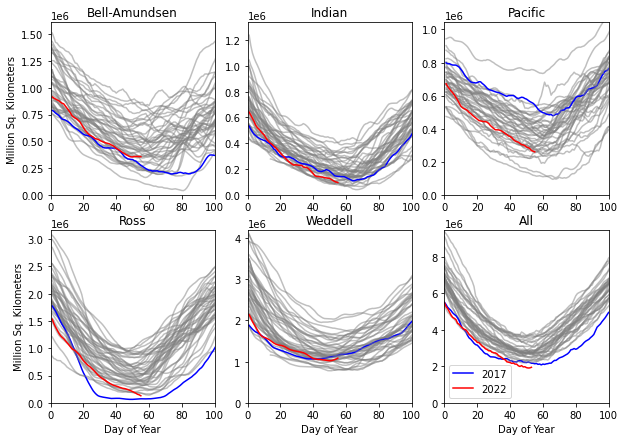

In [10]:
fig, axs = plt.subplots(2,3,figsize=(10,7))

for region, ax in zip(regions+['All'],axs.reshape(-1)):
    
    
    if region == 'All':
        
        df = pickle.load(open('../pickles/Antarctic_all.p','rb'))
        
        for col in df.columns:
            
            df[col] = df[col]*1e6
        
        
    else:
    
        df = pd.read_excel('../data/nsidc/S_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx',
                        sheet_name=f'{region}-Extent-km^2')

        df.drop(columns=['month',   'day'],
                inplace=True)

        for col in df.columns:

            if ~np.isnan(df[col].iloc[59]): pass

            else: df[col] = list(df[col].drop([59])) + [np.nan]
                
        df['doy'] = np.arange(1,df.shape[0]+1)
        df.set_index('doy',inplace=True)
        

    for col in df.columns:
        
        if col == 2017:
            color='b'
            alpha=1
            label=col

        elif col == 2022:
            color='r'
            alpha=1
            label=col

        else:
            color='gray'
            alpha=0.5
            label=None

        ax.plot(df.index,df[col],color=color,alpha=alpha,label=label)
        
        
        
    ax.set_xlim(0,100)
    ax.set_ylim(0,np.nanmax(df.iloc[0])+0.1e6)
    ax.set_title(region)
    
    if region in ['Bell-Amundsen', 'Ross']:
        ax.set_ylabel('Million Sq. Kilometers')  
        
    if region in ['Ross', 'Weddell','All']:
        ax.set_xlabel('Day of Year')
    
    if region == 'All': ax.legend()

plt.savefig(f"twitter1.jpg",dpi=500, bbox_inches='tight')
    
plt.show()

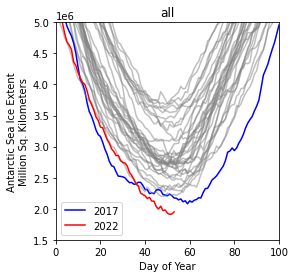

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

region = 'all'

df = pickle.load(open('../pickles/Antarctic_all.p','rb'))

for col in df.columns:

    df[col] = df[col]*1e6

for col in df.columns:

    if col == 2017:
        color='b'
        alpha=1
        label=col

    elif col == 2022:
        color='r'
        alpha=1
        label=col

    else:
        color='gray'
        alpha=0.5
        label=None

    ax.plot(df.index,df[col],color=color,alpha=alpha,label=label)



ax.set_xlim(0,100)
ax.set_ylim(0,np.nanmax(df.iloc[0])+0.1e6)
ax.set_ylim(1.5e6,5e6)
ax.set_title(region)


ax.set_ylabel('Antarctic Sea Ice Extent\nMillion Sq. Kilometers')  


ax.set_xlabel('Day of Year')

ax.legend()

plt.savefig(f"twitter2.jpg",dpi=500, bbox_inches='tight')
    
plt.show()

In [12]:
mins_vals_lst = []
maxs_vals_lst = []

for region in regional_df.columns:
    
    if 'total' not in region:
        
        if 'max' in region:

            maxs_vals_lst.append(np.array(regional_df[region])/1e6)
            
        elif 'min' in region:
            
            mins_vals_lst.append(np.array(regional_df[region])/1e6)
            

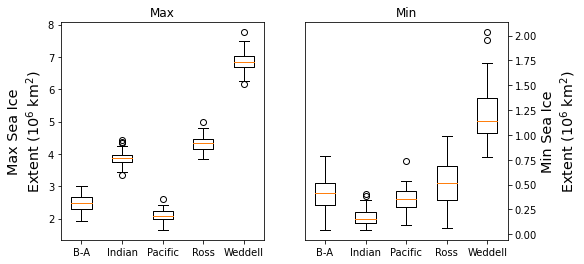

In [13]:
     
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

ax1.boxplot(maxs_vals_lst)
ax1.set_ylabel('Max Sea Ice\nExtent (10$^6$ km$^2$)',fontsize='x-large')
ax2.boxplot(mins_vals_lst)
ax2.set_ylabel('Min Sea Ice\nExtent (10$^6$ km$^2$)',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

ax1.set_xticklabels(tick_labels)
ax2.set_xticklabels(tick_labels)

ax1.set_title('Max')
ax2.set_title('Min')

plt.show()

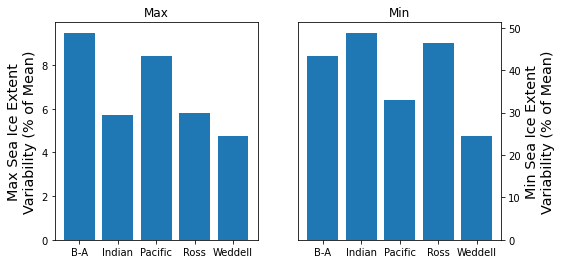

In [14]:
     
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

rel_var_maxs = np.nanstd(maxs_vals_lst,axis=1)/np.nanmean(maxs_vals_lst,axis=1)*100
ax1.bar(np.arange(5),rel_var_maxs)
ax1.set_title('Max')
ax2.set_title('Min')

rel_var_mins = np.nanstd(mins_vals_lst,axis=1)/np.nanmean(mins_vals_lst,axis=1)*100
ax2.bar(np.arange(5),rel_var_mins)

for ax in (ax1,ax2):
    ax.set_xticks(np.arange(5))
    ax.set_xticklabels(tick_labels)
    
ax1.set_ylabel('Max Sea Ice Extent\nVariability (% of Mean)',fontsize='x-large')
ax2.set_ylabel('Min Sea Ice Extent\nVariability (% of Mean)',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

# plt.show()

Text(0.5, 1.0, 'Growth Factor (Max/Min Extent)')

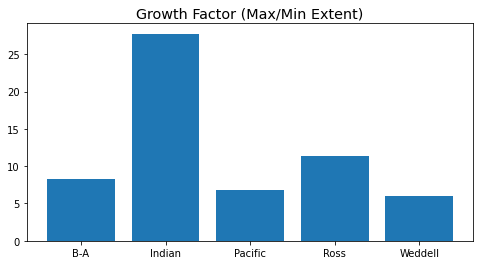

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

growth = np.nanmean(np.divide(maxs_vals_lst,mins_vals_lst),axis=1)

ax.bar(np.arange(5),growth)


ax.set_xticks(np.arange(5))
ax.set_xticklabels(tick_labels)

ax.set_title('Growth Factor (Max/Min Extent)', fontsize='x-large')

In [16]:
rvals_mins = {}
pvals_mins = {}
rvals_maxs = {}
pvals_maxs = {}

for region in regional_df.columns:
    
    if 'total' not in region:
        
        if 'max' in region:

            stats  = linregress(regional_df['total_max'],regional_df[region])

            rvals_maxs[region] = stats[2]
            pvals_maxs[region] = stats[3]
            
        elif 'min' in region:

            stats  = linregress(regional_df['total_min'],regional_df[region])

            rvals_mins[region] = stats[2]
            pvals_mins[region] = stats[3]
        

In [17]:
### Make mask with p vals ###


alpha=0.3

p_mask_maxs = np.array(list(pvals_maxs.values()))
p_mask_maxs[p_mask_maxs > 0.05] = alpha
p_mask_maxs[p_mask_maxs !=alpha] = 1

###

p_mask_mins = np.array(list(pvals_mins.values()))
p_mask_mins[p_mask_mins > 0.05] = alpha
p_mask_mins[p_mask_mins !=alpha] = 1

###

rgba_colors_maxs = np.zeros((5,4))
rgba_colors_maxs[:,1] = 1
rgba_colors_maxs[:, 3] = p_mask_maxs

###

rgba_colors_mins = np.zeros((5,4))
rgba_colors_mins[:,0] = 1
rgba_colors_mins[:, 3] = p_mask_mins

### Rvals

In [18]:
f = np.fromfile('/home/robbie/Dropbox/book_chapter/data/region_s.msk',offset=300,dtype=np.int8)

f = f.reshape((332,316)).astype(np.float32)

f[f>10] = np.nan

f[f==2] = 6.1

f[f==6] = 2

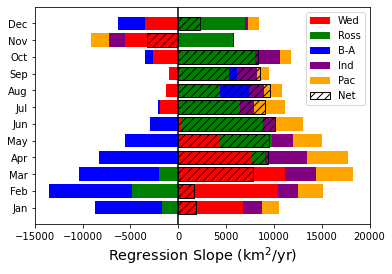

In [52]:
(data,data_stack,data_shape) = pickle.load(open('../data/stackbar.p','rb'))
imshow_months = [m[:3] for m in list(calendar.month_name[1:14])]
short_regions = ['Wed','Ross','B-A','Ind','Pac']
cols = ['r','g','b','purple','orange']

fig = plt.figure()
ax = plt.subplot(111)

for i, name in zip(np.arange(0, data_shape[0]), short_regions):
    ax.barh(np.arange(data_shape[1]),
           data[i],
           left=data_stack[i],
           color=cols[i],
           label=name)
    
ax.barh(np.arange(12),np.sum(data,axis=0), fc=(0,0,0,0),
       edgecolor='black', hatch='///', label='Net')

ax.axvline(0,color='k')

ax.set_yticks(np.arange(0,12))
ax.set_yticklabels(imshow_months)

ax.set_xlim(-15_000,+20_000)

ax.set_xlabel('Regression Slope (km$^2$/yr)',fontsize='x-large')

ax.legend()

plt.show()

/tmp/ipykernel_117541/1051465997.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(tick_labels)


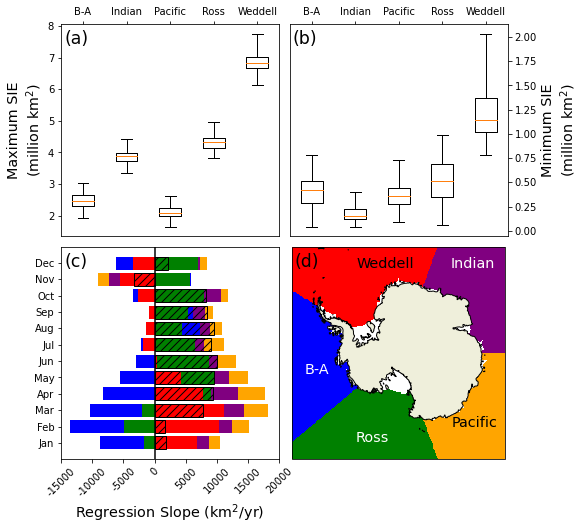

In [63]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

ax1,ax2,ax3,ax4 = axs.reshape(-1)

####################


ax1.boxplot(maxs_vals_lst,whis=[0,100])
ax1.set_xticklabels(tick_labels)
ax1.xaxis.set_label_position('top') 
ax1.xaxis.tick_top()
ax1.set_ylabel('Maximum SIE\n(million km$^2$)', fontsize='x-large')



ax2.set_xticklabels(tick_labels)
ax2.boxplot(mins_vals_lst,whis=[0,100])
ax2.xaxis.set_label_position('top') 
ax2.xaxis.tick_top()
ax2.yaxis.set_label_position('right') 
ax2.yaxis.tick_right()
ax2.set_ylabel('Minimum SIE\n(million km$^2$)', fontsize='x-large')


####################

for i, name in zip(np.arange(0, data_shape[0]), short_regions):
    ax3.barh(np.arange(data_shape[1]),
           data[i],
           left=data_stack[i],
           color=cols[i],
           label=name)
    
ax3.barh(np.arange(12),np.sum(data,axis=0), fc=(0,0,0,0),
       edgecolor='black', hatch='///', label='Net')

ax3.axvline(0,color='k')

ax3.set_yticks(np.arange(0,12))
ax3.set_yticklabels(imshow_months)
ax3.set_xticks(np.arange(-15_000,20_001,5_000))
ax3.set_xticklabels(np.arange(-15_000,20_001,5_000),rotation=45)

ax3.set_xlim(-15_000,+20_000)

ax3.set_xlabel('Regression Slope (km$^2$/yr)',fontsize='x-large')

# ax3.legend(loc='center left')

###############
(lons,lats,f_regrid,my_cmap) = pickle.load(open('../data/mask_map.p','rb'))

ax4.remove()

ax4 = fig.add_subplot(2,2,4,projection=ccrs.SouthPolarStereo())

ax4.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax4.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

# ax4.gridlines(xlocs=[-130,-60,20,90,160])

f_regrid[f_regrid>10] = np.nan

cmesh = ax4.pcolormesh(np.array(lons),
                      np.array(lats),
                      np.array(f_regrid)[:-1,:-1],
                      vmin=1.5,vmax=6.5,
             transform=ccrs.PlateCarree(),zorder=0,cmap=my_cmap)

ax4.plot([180, 180], [-90, -85],
         zorder=3, color=cfea.COLORS['land'],
         linewidth=2,
         transform=ccrs.PlateCarree())


# fig.colorbar(cmesh)



ax4.annotate(text='Weddell',xy=(0.3,0.9),xycoords='axes fraction',color='black',fontsize='x-large')
ax4.annotate(text='Indian',xy=(0.95,0.9),xycoords='axes fraction',color='white',fontsize='x-large',ha='right')
ax4.annotate(text='Pacific',xy=(0.75,0.15),xycoords='axes fraction',color='k',fontsize='x-large')
ax4.annotate(text='Ross',xy=(0.3,0.08),xycoords='axes fraction',color='white',fontsize='x-large')
ax4.annotate(text='B-A',xy=(0.06,0.4),xycoords='axes fraction',color='white',fontsize='x-large')

 
##############
for ax, letter in zip([ax1,ax2,ax3,ax4],
                      ['a','b','c','d']):
    
    ax.annotate(xy=(0.07,0.93),
                 text=f'({letter})',
                 xycoords='axes fraction',
                 fontsize='xx-large',
                 ha='center',
                 va='center')
    
#####################

plt.subplots_adjust(wspace=0.05,hspace=0.05)

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'

plt.savefig(f"{data_dir}/fig_9_c.png",dpi=500, bbox_inches='tight')

plt.show()

/tmp/ipykernel_117541/2658801220.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(tick_labels)


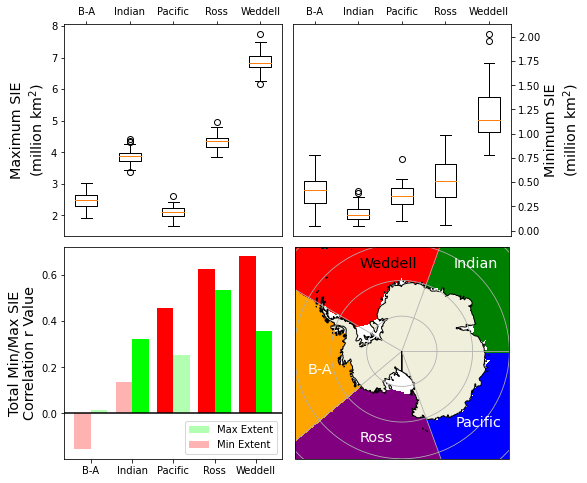

In [42]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

ax1,ax2,ax3,ax4 = axs.reshape(-1)

####################


ax1.boxplot(maxs_vals_lst)
ax1.set_xticklabels(tick_labels)
ax1.xaxis.set_label_position('top') 
ax1.xaxis.tick_top()
ax1.set_ylabel('Maximum SIE\n(million km$^2$)', fontsize='x-large')



ax2.set_xticklabels(tick_labels)
ax2.boxplot(mins_vals_lst)
ax2.xaxis.set_label_position('top') 
ax2.xaxis.tick_top()
ax2.yaxis.set_label_position('right') 
ax2.yaxis.tick_right()
ax2.set_ylabel('Minimum SIE\n(million km$^2$)', fontsize='x-large')


####################


ax3.bar(np.arange(5)+0.2,
        rvals_maxs.values(),
        color=rgba_colors_maxs,
        width=0.4,
        label='Max Extent')

ax3.bar(np.arange(5)-0.2,
        rvals_mins.values(),
        color=rgba_colors_mins,
        width=0.4,
        label='Min Extent')

tick_labels = [x.split('_')[0] for x in rvals_maxs.keys()]
tick_labels = ['B-A'] + tick_labels[1:]

ax3.set_xticks(np.arange(5))
ax3.set_xticklabels(labels=tick_labels,rotation=0)

ax3.axhline(0,color='k')

ax3.legend(loc='lower right')

ax3.set_ylabel('Total Min/Max SIE\nCorrelation r Value', fontsize='x-large')

###############

(lons,lats,f_regrid,my_cmap) = pickle.load(open('../data/mask_map.p','rb'))

ax4.remove()

ax4 = fig.add_subplot(2,2,4,projection=ccrs.SouthPolarStereo())

ax4.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax4.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax4.gridlines(xlocs=[-130,-60,20,90,160])

f_regrid[f_regrid>10] = np.nan

cmesh = ax4.pcolormesh(np.array(lons),
                      np.array(lats),
                      np.array(f_regrid)[:-1,:-1],
                      vmin=1.5,vmax=6.5,
             transform=ccrs.PlateCarree(),zorder=0,cmap=my_cmap)


# fig.colorbar(cmesh)



ax4.annotate(text='Weddell',xy=(0.3,0.9),xycoords='axes fraction',color='black',fontsize='x-large')
ax4.annotate(text='Indian',xy=(0.95,0.9),xycoords='axes fraction',color='white',fontsize='x-large',ha='right')
ax4.annotate(text='Pacific',xy=(0.75,0.15),xycoords='axes fraction',color='white',fontsize='x-large')
ax4.annotate(text='Ross',xy=(0.3,0.08),xycoords='axes fraction',color='white',fontsize='x-large')
ax4.annotate(text='B-A',xy=(0.06,0.4),xycoords='axes fraction',color='white',fontsize='x-large')

##############

plt.subplots_adjust(wspace=0.05,hspace=0.05)

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'

# plt.savefig(f"{data_dir}/fig_9_c.png",dpi=500, bbox_inches='tight')

plt.show()

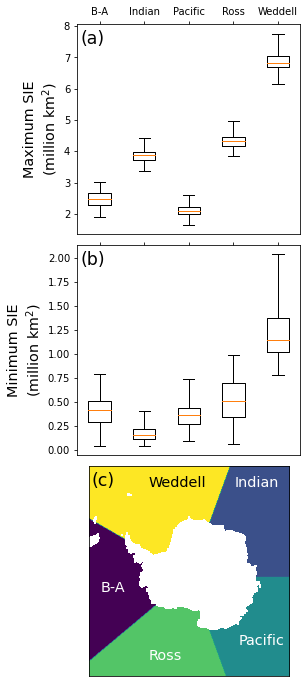

In [25]:
fig, axs = plt.subplots(3,1,figsize=(4,12))

ax1,ax2,ax3 = axs.reshape(-1)

####################


ax1.boxplot(maxs_vals_lst,whis=[0,100])
ax1.set_xticklabels(tick_labels)
ax1.xaxis.set_label_position('top') 
ax1.xaxis.tick_top()
ax1.set_ylabel('Maximum SIE\n(million km$^2$)', fontsize='x-large')




ax2.boxplot(mins_vals_lst,whis=[0,100])
ax2.xaxis.set_label_position('top') 
ax2.xaxis.tick_top()
ax2.set_ylabel('Minimum SIE\n(million km$^2$)', fontsize='x-large')
ax2.set_xticklabels([])

###############

ax3.imshow(f)

ax3.annotate(text='Weddell',xy=(0.3,0.9),xycoords='axes fraction',color='black',fontsize='x-large')
ax3.annotate(text='Indian',xy=(0.95,0.9),xycoords='axes fraction',color='white',fontsize='x-large',ha='right')
ax3.annotate(text='Pacific',xy=(0.75,0.15),xycoords='axes fraction',color='white',fontsize='x-large')
ax3.annotate(text='Ross',xy=(0.3,0.08),xycoords='axes fraction',color='white',fontsize='x-large')
ax3.annotate(text='B-A',xy=(0.06,0.4),xycoords='axes fraction',color='white',fontsize='x-large')

ax3.set_xticks([])
ax3.set_yticks([])


for ax, letter in zip([ax1,ax2],
                      ['a','b']):
    
    ax.annotate(xy=(0.07,0.93),
                 text=f'({letter})',
                 xycoords='axes fraction',
                 fontsize='xx-large',
                 ha='center',
                 va='center')

ax3.annotate(xy=(0.07,0.93),
             text=f'(c)',
             xycoords='axes fraction',
             fontsize='xx-large',
             ha='center',
             va='center')
 
##############

plt.subplots_adjust(wspace=0.05,hspace=0.05)

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'

# plt.savefig(f"{data_dir}/fig_9_c.png",dpi=500, bbox_inches='tight')

plt.show()

In [17]:
f.shape

(332, 316)